In [2]:
import pandas as pd
np = pd.np
import matplotlib.pyplot as plt

In [3]:
suffix = '2019_Feb_05'
df = pd.read_csv('data/kaiterra_fieldeggid_15min_{}_panel.csv'.format(suffix), index_col=[0,1], parse_dates=True)

In [4]:
df.sort_index(inplace=True)
df

location        pm25        pm10
field_egg_id timestamp_round                                            
113E         2018-03-01 00:00:00  Shubhra Mittal         NaN         NaN
             2018-03-01 00:15:00  Shubhra Mittal         NaN         NaN
             2018-03-01 00:30:00  Shubhra Mittal         NaN         NaN
             2018-03-01 00:45:00  Shubhra Mittal         NaN         NaN
             2018-03-01 01:00:00  Shubhra Mittal         NaN         NaN
             2018-03-01 01:15:00  Shubhra Mittal         NaN         NaN
             2018-03-01 01:30:00  Shubhra Mittal         NaN         NaN
             2018-03-01 01:45:00  Shubhra Mittal         NaN         NaN
             2018-03-01 02:00:00  Shubhra Mittal         NaN         NaN
             2018-03-01 02:15:00  Shubhra Mittal         NaN         NaN
             2018-03-01 02:30:00  Shubhra Mittal         NaN         NaN
             2018-03-01 02:45:00  Shubhra Mittal         NaN         NaN
             2018-03-01 03:00:00  Shubhra Mittal         NaN         NaN
             2018-03-01 03:15:00  Shubhra Mittal         NaN         NaN
             2018-03-01 03:30:00  Shubhra Mittal         NaN         NaN
             2018-03-01 03:45:00  Shubhra Mittal         NaN         NaN
             2018-03-01 04:00:00  Shubhra Mittal         NaN         NaN
             2018-03-01 04:15:00  Shubhra Mittal         NaN         NaN
             2018-03-01 04:30:00  Shubhra Mittal         NaN         NaN
             2018-03-01 04:45:00  Shubhra Mittal         NaN         NaN
             2018-03-01 05:00:00  Shubhra Mittal         NaN         NaN
             2018-03-01 05:15:00  Shubhra Mittal         NaN         NaN
             2018-03-01 05:30:00  Shubhra Mittal         NaN         NaN
             2018-03-01 05:45:00  Shubhra Mittal         NaN         NaN
             2018-03-01 06:00:00  Shubhra Mittal         NaN         NaN
             2018-03-01 06:15:00  Shubhra Mittal         NaN         NaN
             2018-03-01 06:30:00  Shubhra Mittal         NaN         NaN
             2018-03-01 06:45:00  Shubhra Mittal         NaN         NaN
             2018-03-01 07:00:00  Shubhra Mittal         NaN         NaN
             2018-03-01 07:15:00  Shubhra Mittal         NaN         NaN
...                                          ...         ...         ...
EAC8         2019-02-05 09:00:00             IGC  107.333333  137.666667
             2019-02-05 09:15:00             IGC  107.666667  144.000000
             2019-02-05 09:30:00             IGC  101.666667  133.000000
             2019-02-05 09:45:00             IGC   95.333333  121.000000
             2019-02-05 10:00:00             IGC   93.000000  124.333333
             2019-02-05 10:15:00             IGC  111.000000  143.666667
             2019-02-05 10:30:00             IGC  110.666667  148.000000
             2019-02-05 10:45:00             IGC   94.333333  131.333333
             2019-02-05 11:00:00             IGC   80.000000  104.000000
             2019-02-05 11:15:00             IGC   72.666667   95.666667
             2019-02-05 11:30:00             IGC  157.333333  188.000000
             2019-02-05 11:45:00             IGC  127.000000  153.333333
             2019-02-05 12:00:00             IGC   88.666667  109.000000
             2019-02-05 12:15:00             IGC   79.000000  103.000000
             2019-02-05 12:30:00             IGC   87.666667  111.333333
             2019-02-05 12:45:00             IGC  106.000000  135.000000
             2019-02-05 13:00:00             IGC  110.000000  140.666667
             2019-02-05 13:15:00             IGC  116.333333  155.333333
             2019-02-05 13:30:00             IGC  125.333333  171.000000
             2019-02-05 13:45:00             IGC  137.333333  180.333333
             2019-02-05 14:00:00             IGC  170.333333  219.666667
             2019-02-05 14:15:00             IGC  196.666667  266.333333
             2019-02-05 1

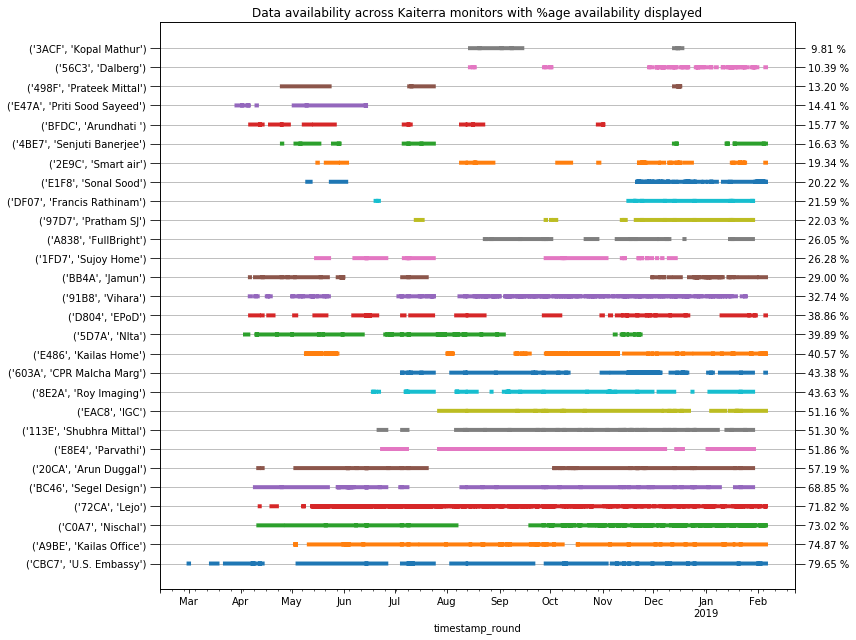

In [9]:
# display availability based on percent counts
grouped = df.groupby(level=0)
validfracs = (grouped.pm25.count() / grouped.pm25.size())
validfracs.sort_values(ascending=False, inplace=True)

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)

for count, name in enumerate(validfracs.index, 1):
    # plot the data availability
    group = grouped.get_group(name)
    group.reset_index(level=0, drop=True, inplace=True)
    group.pm25.where(np.isnan(group.pm25), other=count).plot(lw=4)

ax.set_yticks(np.arange(1,count+1))
ax.set_yticklabels([(name, grouped.get_group(name).location[0]) for name in validfracs.index])
ax.tick_params(axis='y', right=0, left=1, length=10)
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(ax.get_yticks())
ax2.set_yticklabels(['{:5.2f} %'.format(val*100) for val in validfracs])
ax2.tick_params(axis='y', right=1, left=0, length=10)
ax.set_title('Data availability across Kaiterra monitors with %age availability displayed')
ax.grid(axis='y')
fig.tight_layout()
plt.show()

In [10]:
fig.savefig('data/datagaps_kaiterra_fieldeggs_{}.png'.format('2019_Feb_05'))
fig.savefig('data/datagaps_kaiterra_fieldeggs_{}.pdf'.format('2019_Feb_05'))

In [11]:
plt.close('all')